In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 2500)
pd.set_option('display.max_colwidth', 2500)

In [2]:
from pycaret.datasets import get_data
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
dataset.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [4]:
dataset.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [5]:
dataset['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [6]:
dataset.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [7]:
dataset.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [8]:
dataset.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [9]:
dataset.sex.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
dataset['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [11]:
dataset['income >50K'].value_counts()

income >50K
0    24720
1     7841
Name: count, dtype: int64

In [12]:
dataset.shape

(32561, 14)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [14]:
data = dataset.sample(frac=0.95, random_state=786)  # 95% даних на навчання
data_unseen = dataset.drop(data.index)  # 5% для тестування

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape)) # виведемо отримані розміри даних
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (30933, 14)
Unseen Data For Predictions: (1628, 14)


In [19]:
from pycaret import classification
s = classification.setup(data = dataset,
                         train_size = 0.9,
                         target = 'income >50K', 
                         session_id=123)

,Description,Value
0,Session id,123
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 64)"
5,Transformed train set shape,"(29304, 64)"
6,Transformed test set shape,"(3257, 64)"
7,Numeric features,5
8,Categorical features,8
9,Preprocess,True


In [16]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

In [17]:
# нульові значення замінимо найбільш популярним значенням,
# знову перевіримо на відсутність нульових значень,
# далі перезапустимо s = classification.setup(...)
dataset['workclass'].fillna(dataset['workclass'].mode()[0], inplace=True)
dataset['occupation'].fillna(dataset['occupation'].mode()[0], inplace=True)
dataset['native-country'].fillna(dataset['native-country'].mode()[0], inplace=True)

In [18]:
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64

In [20]:
# check transformed X_train
classification.get_config('X_train')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
6309,32,Private,Some-college,10,Divorced,Sales,Not-in-family,White,Female,0,0,55,United-States
23,43,Private,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States
26960,44,Private,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States
24863,61,Private,12th,8,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States
308,35,Private,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,50,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2051,20,United-States
5624,21,Private,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Amer-Indian-Eskimo,Female,0,0,46,United-States
1757,40,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States
27609,67,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States


In [21]:
# list columns of transformed X_train 
classification.get_config('X_train').columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [22]:
# check available models
classification.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [23]:
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8726,0.9286,0.6618,0.7762,0.7143,0.6330,0.6364,0.7240
gbc,Gradient Boosting Classifier,0.8646,0.9217,0.6030,0.7850,0.6819,0.5978,0.6063,2.3040
ada,Ada Boost Classifier,0.8606,0.9157,0.6066,0.7660,0.6769,0.5896,0.5962,1.0900
lr,Logistic Regression,0.8505,0.9041,0.5956,0.7334,0.6572,0.5630,0.5680,3.1770
knn,K Neighbors Classifier,0.8439,0.8775,0.6425,0.6886,0.6646,0.5630,0.5638,1.3590
rf,Random Forest Classifier,0.8438,0.8913,0.6214,0.6974,0.6570,0.5564,0.5580,1.8770
lda,Linear Discriminant Analysis,0.8397,0.8918,0.5604,0.7127,0.6274,0.5272,0.5334,0.4220
ridge,Ridge Classifier,0.8391,0.8918,0.5001,0.7483,0.5994,0.5037,0.5198,0.3410
et,Extra Trees Classifier,0.8240,0.8457,0.5910,0.6475,0.6179,0.5039,0.5048,2.4170
dt,Decision Tree Classifier,0.8161,0.7665,0.6054,0.6218,0.6133,0.4927,0.4929,0.3640


In [24]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [25]:
type(best)

lightgbm.sklearn.LGBMClassifier

In [26]:
# train model
lightgbm = classification.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8642,0.9252,0.6388,0.7593,0.6938,0.6074,0.6112
1,0.8785,0.9327,0.6629,0.7986,0.7245,0.6474,0.6520
2,0.8669,0.9217,0.6331,0.7734,0.6963,0.6122,0.6172
3,0.8700,0.9276,0.6459,0.7768,0.7053,0.6229,0.6272
4,0.8720,0.9181,0.6638,0.7723,0.7140,0.6321,0.6351
5,0.8874,0.9368,0.6993,0.8069,0.7492,0.6771,0.6800
6,0.8720,0.9346,0.6695,0.7687,0.7157,0.6336,0.6361
7,0.8638,0.9274,0.6572,0.7472,0.6993,0.6118,0.6139
8,0.8802,0.9364,0.6898,0.7868,0.7351,0.6581,0.6605


In [27]:
# tune hyperparameters of model
tuned_lightgbm = classification.tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8635,0.9243,0.6388,0.7567,0.6928,0.6059,0.6095
1,0.8768,0.9317,0.6473,0.8032,0.7169,0.6393,0.6454
2,0.8656,0.9204,0.6289,0.7708,0.6927,0.6078,0.6129
3,0.8697,0.9267,0.6431,0.7774,0.7039,0.6213,0.6259
4,0.8727,0.9180,0.6681,0.7721,0.7163,0.6348,0.6376
5,0.8836,0.9358,0.6879,0.8003,0.7399,0.6655,0.6686
6,0.8710,0.9320,0.6709,0.7641,0.7145,0.6316,0.6339
7,0.8662,0.9257,0.6558,0.7565,0.7026,0.6168,0.6195
8,0.8788,0.9357,0.6813,0.7872,0.7304,0.6528,0.6557


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [29]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


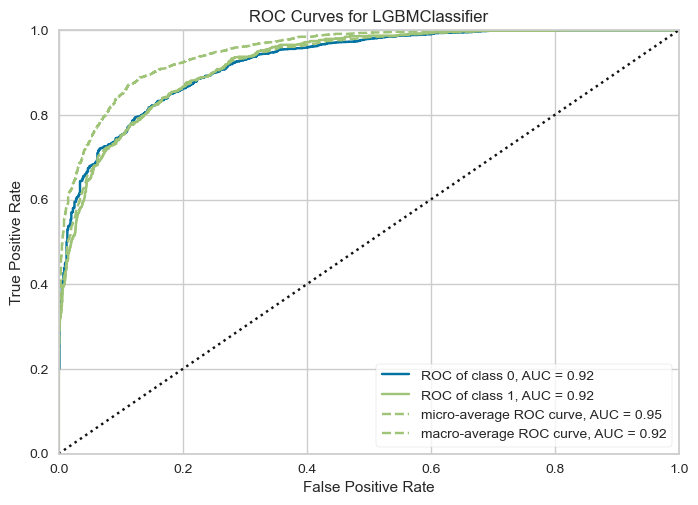

In [30]:
classification.plot_model(tuned_lightgbm, plot = 'auc')

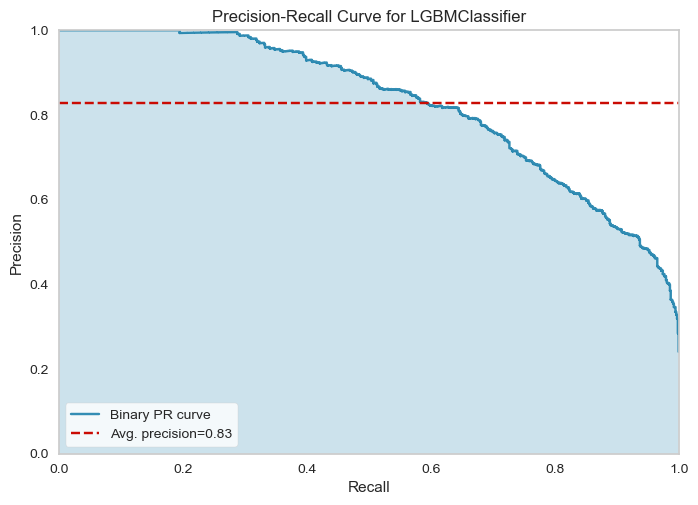

In [31]:
classification.plot_model(tuned_lightgbm, plot = 'pr')

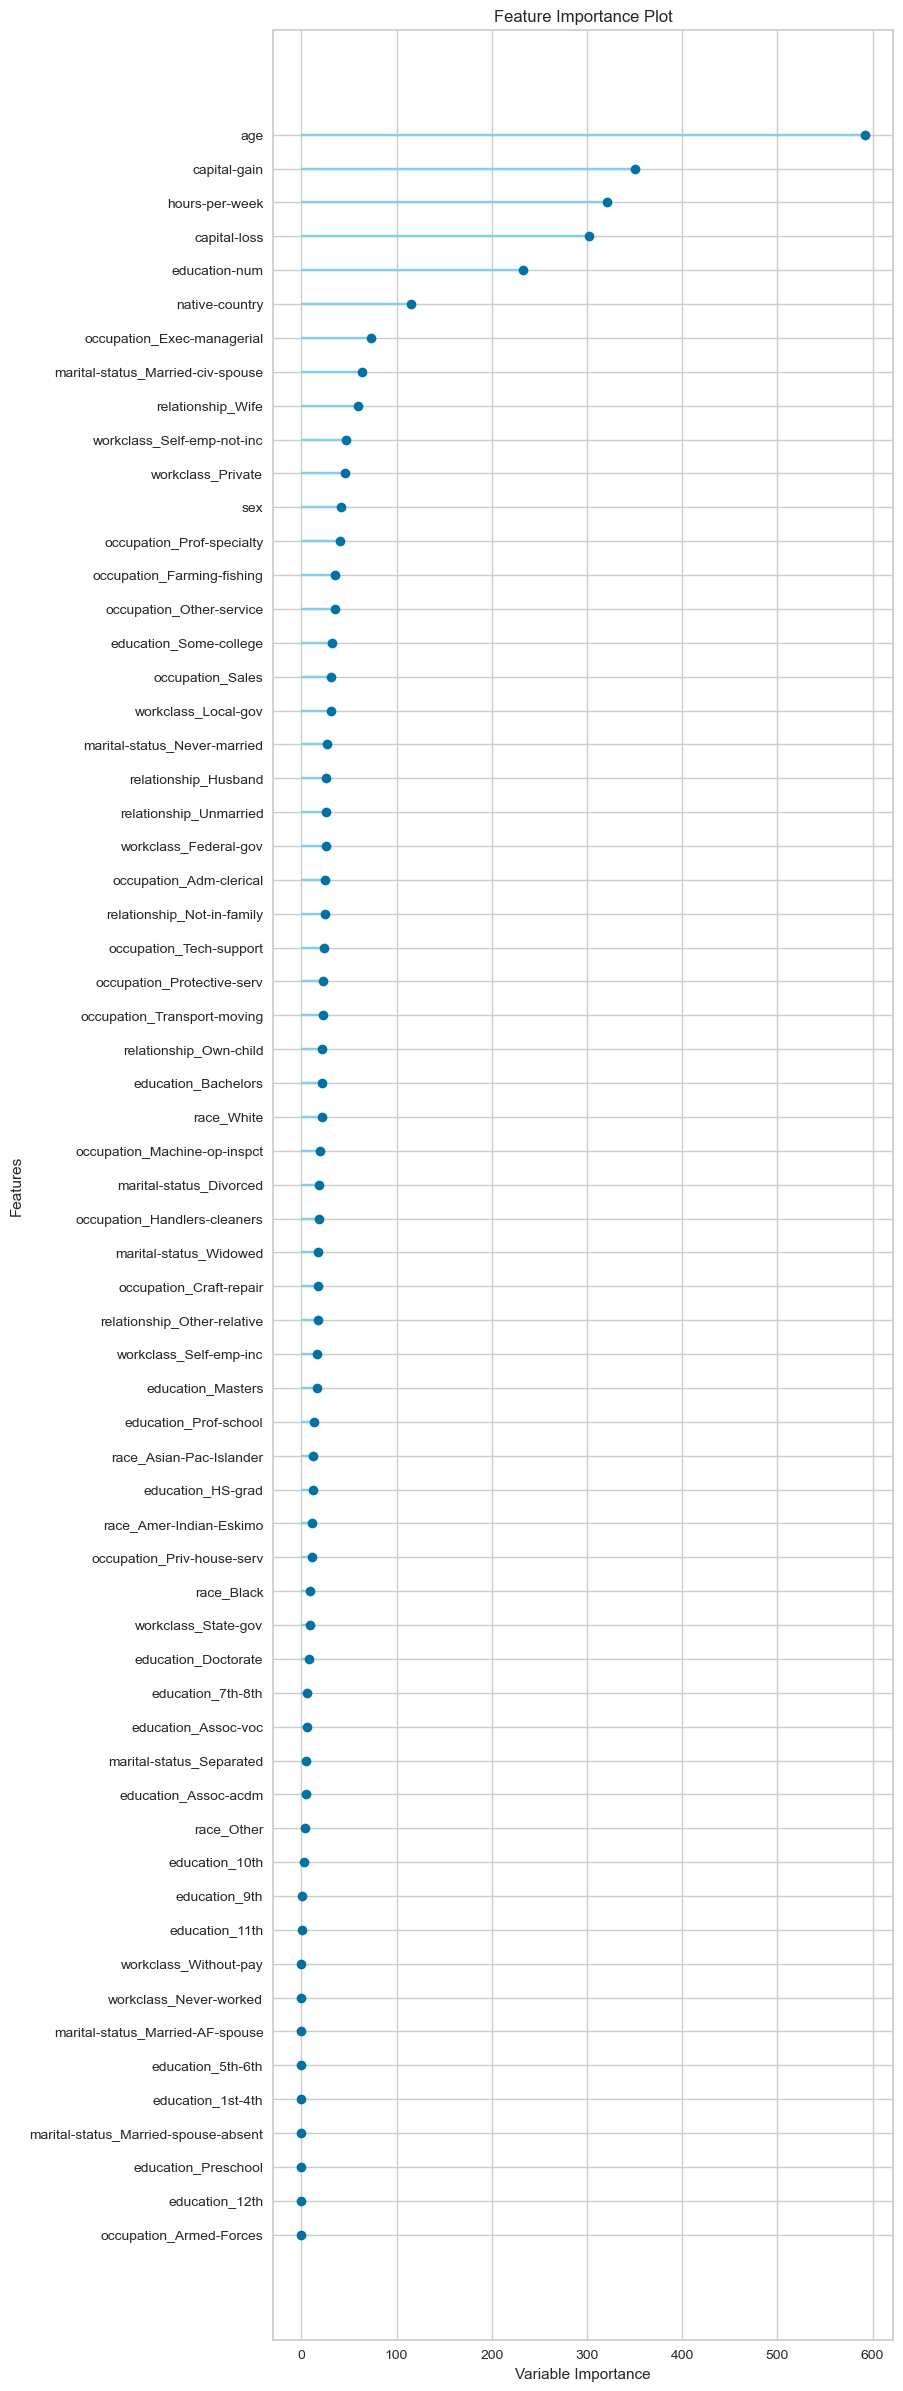

In [32]:
classification.plot_model(tuned_lightgbm, plot='feature_all')

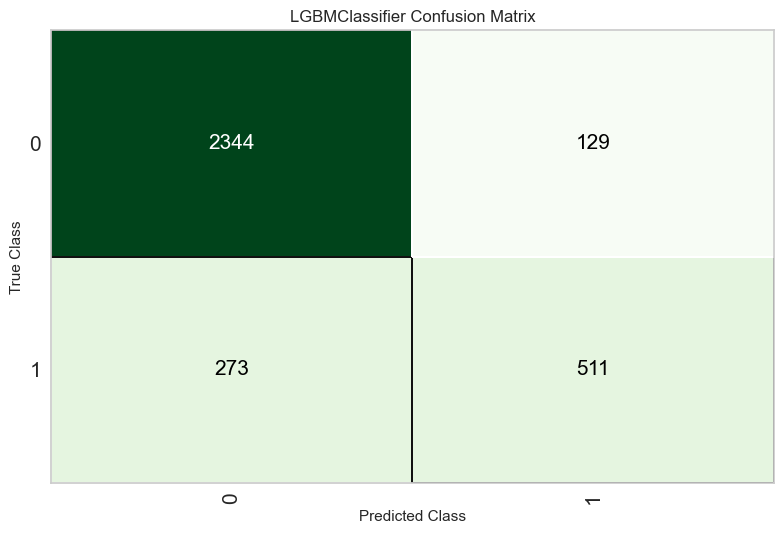

In [33]:
classification.plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [1]:
classification.evaluate_model(tuned_lightgbm)

NameError: name 'classification' is not defined

In [35]:
classification.predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8766,0.9247,0.6518,0.7984,0.7177,0.6397,0.6451


In [36]:
# finalize lightgbm model
final_lightgbm = classification.finalize_model(tuned_lightgbm)
# print final model parameters
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'education-num',
                                             'capital-gain', 'capital-loss',
                                             'hours-per-week'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWra...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                           

In [37]:
classification.predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8889,0.9385,0.6824,0.8256,0.7472,0.6768,0.6818


In [41]:
unseen_predictions = classification.predict_model(final_lightgbm, data = data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8986,0.9505,0.7239,0.8133,0.7660,0.7016,0.7035


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
0,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,1,0.7854
1,48,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,1,0.5221
2,35,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Puerto-Rico,0,0,0.9003
3,29,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,1,0,0.5344
4,20,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,0,0,0.9992


In [51]:
unseen_predictions[unseen_predictions['prediction_score'] > 0.9996]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
226,17,NaN,11th,7,Never-married,NaN,Own-child,White,Female,0,0,18,United-States,0,0,0.9997
591,18,Private,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,0,0,0.9997
1135,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,8,United-States,0,0,0.9997
1199,19,Private,12th,8,Never-married,Sales,Own-child,White,Female,0,0,18,United-States,0,0,0.9997
1337,21,Local-gov,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,594,0,4,United-States,0,0,0.9997
1539,17,Private,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States,0,0,0.9997


In [52]:
# saving the final model
classification.save_model(final_lightgbm,'final_lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'education-num',
                                              'capital-gain', 'capital-loss',
                                              'hours-per-week'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
            

In [54]:
# loading the saved model
saved_final_lightgbm = classification.load_model('final_lightgbm_model')

Transformation Pipeline and Model Successfully Loaded


In [55]:
# predict on new data
new_prediction = classification.predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8986,0.9505,0.7239,0.8133,0.7660,0.7016,0.7035


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,prediction_label,prediction_score
0,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,1,0.7854
1,48,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,1,0.5221
2,35,Private,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Puerto-Rico,0,0,0.9003
3,29,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,1,0,0.5344
4,20,Private,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,0,0,0.9992
